© 2019 Suzy Beeler. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](forward_euler.ipynb).
___

# Objective 

In this tutorial, we will cover how to write a simple numerical integrator using the Forward Euler method to examine the dynamics of exponential growth.

# The Forward Euler Method

Developing simple ways to solve ordinary differential equations has long been an area of intense research. While deriving the analytical solution may be simple in some cases, it is often useful to solve them numerically, especially if slamming out the analytical solution will give you carpal tunnel.

While there are many ways to numerically integrate these equations, in this tutorial we will examine the Forward Euler method. Say we have an ordinary differential equation such as

$$\frac{dN}{dt} = k N(t) \tag{1}$$

as would be the case for exponential growth, where $k$ is some growth-rate constant and  $t$  is time. Rather than solving this analytically (although it is trivial), we can solve it numerically by starting at some given value of $N$, evaluating Equation (1) for a given time step $\Delta t$, and updating the new value of $N$ at this new time $t+ \Delta t$. We can phrase this mathematically as

$$N(t+ \Delta t) = N(t) + kN(t) \Delta t .\tag{2}$$

Say our initial value ($N$ at $t=0$) is  $N=10$  and $k=1$. We can take a time step $\Delta t=0.1$ and find that the change in value of $N$ is

$$\Delta N = kN\Delta t = 1. \tag{3}$$

We can then compute the new value of $N$ at time $t+\Delta t$ as

$$N(t+\Delta t) = N(t) + \Delta N = 10 + 1 = 11.\tag{4}$$

We can then take another step forward in time and repeat the process for as long as we would like. As the total time we'd like to integrate over becomes large, it becomes obvious why using a computer is a far more attractive approach than scribbling it by hand.

A major point to be wary of is the instability of this method. The error in this scales with the square of our step size. We must choose a sufficiently small step in time such that at most only one computable event must occur. For example, if we are integrating exponential growth of bacterial cells, we don't want to take time steps larger than a cell division! This requirement is known as the Courant-Friedrichs-Lewy condition and is important for many different time-marching computer simulations.

As is often the case, the best way to learn is to do. Let's give our digits some exercise and numerically integrate this exponential growth differential equation. 

# Numerically integrating exponential growth

In [7]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# for pretty plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

In order to numerically integrate Equation (1), we first need to specify a few parameters, such as the initial value of $N$, the growth rate $k$, and the time step $\Delta t$.

In [13]:
# parameters for our ODE
N_0 = 1
k = 0.02 # min^-1

# parameters for our integration
dt = 0.1 # min
total_time = 120 # min

Now we can set up an array into which we can save our values of $N$ as they increase with time, with the first value in the `N_t` array being set to `N_0` as specified above.

In [14]:
# determine the number of steps that will be taken
num_steps = int(total_time/dt)

# initilize an array of length num_steps into which to store values of N
N_t = np.zeros(num_steps)
N_t[0] = N_0

Now we can actually compute the numerical integration, by looping through the `N_t` array and filling in the values of `N` as we go. At each time point $N(t) = N(t-\Delta t) + kN(t-\Delta t) \Delta t,$ where $t - \Delta t$ refers to the previous entry in the `N_t` array.

In [15]:
# numerically integrate by looping through N_t
for t in range(1,num_steps):
    
    # first calculate dN, using pevious N_t entry
    dN = N_t[t-1] * k * dt
    
    # update current N_t entry
    N_t[t] = N_t[t-1] + dN

And done! The numerical integration of more than a thousand time steps just happened nearly instantly, showing the immense value of using code to automate computational processes. Let's now plot the results. We currently have the $N$ values to plot, we just need to specify the $t$ values as well. 

Text(0, 0.5, 'N')

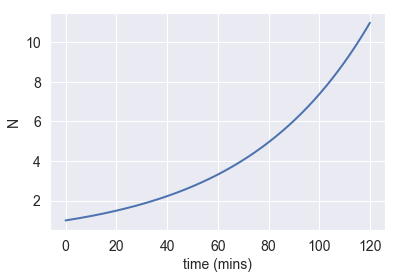

In [16]:
# make array of time values
times = np.arange(num_steps)*dt

# plot 
plt.plot(times, N_t)
plt.xlabel("time (mins)")
plt.ylabel("N")

That certainly looks exponential! Let's plot the known solution of $N(t) = N_0 e^{kt}$ on top of our numerical integration for comparison. 

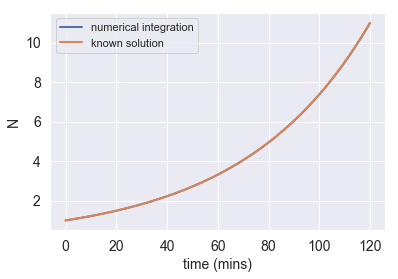

In [17]:
# compute the known solution
soln = N_0 * np.exp(k*times)

# plot both our integration and the known solution
plt.plot(times, N_t)
plt.plot(times, soln)
plt.xlabel("time (mins)")
plt.ylabel("N")
plt.legend(["numerical integration", "known solution"])

Nice! Our numerical integration and the known solution are so similar that the two lines can't be distinguished from each other in the plot above. Recall how we said that picking a sufficiently small $\Delta t$ is necessary for numerical integration to work? From here, it's worth while to see how the plot above changes for different values of `dt`. As `dt` increases, our numerical integration deviates more and more from the known solution, with our integration systematically underestimating the true values. This is because with exponential growth, the rate of growth is always increasing and taking too large of a time step fails to capture this increase. 